# Integración multidimensional usando la técnica de Monte Carlo

Alonso Jiménez Moya
Carné: 2019031476

Por medio del método de Monte Carlo multidimensional calcule la integral:
$$
I = \int_0^1\mathrm{d}x_1\int_0^1\mathrm{d}x_2 \ldots\int_0^1\mathrm{d}x_{10}~(x_1 + x_2 + \ldots + x_{10})^2 = \dfrac{155}{6}
$$
1. Realice el cálculo de la integral 16 veces para un número de muestras _nMuestras_ = 2 y calcule el promedio del resultado obtenido en cada iteración (sin determinar una semilla para el generador de números aleatorios). Imprima el resultado obtenido. **1 punto**
2. Repita el paso anterior para _nMuestras_ = 4,8, ... , 8192. Imprima el resultado promedio para cada valor de _nMuestras_. **1 punto**
3. Grafique el error del valor obtenido de la integral para cada número de muestras contra $\dfrac{1}{\sqrt{nMuestras}}$. ¿Cuál es el comportamiento del gráfico obtenido? Comente. **2 puntos**

Paso 1.

In [2]:
import numpy as np

def f(numeroDeMuestras):
    '''
    Funcion auxiliar para el calculo f(xi)
    :param numeroDeMuestras: numero de muestras con el que quiere hacer la iteracion
    :return: resultado de la funcion evaluada en MC con el promedio
    '''
    resultado = 0
    for n in range(numeroDeMuestras):
        iteracion = 0
        xi = np.random.uniform(size = 10)
        for i in xi:
            iteracion += i
        iteracion = iteracion**2
        resultado += iteracion
    return resultado/numeroDeMuestras



def solucionMonteCarlo(numeroDeMuestras):
    '''
    Resuelve integral mulriple por el metodo de monte carlo
    :param numeroDeMuestras: numero de muestras con el que se quiere hacer el resukltado
    :return: resultado encontrado por metodo de montecarlo
    '''
    limites = [0,1]
    resultado = (limites[1]-limites[0])**10 * f(numeroDeMuestras)
    return resultado


def variasIteracionesMC(numeroDeIteraciones, numeroMuestra):
    '''
    calcula un promedio para un numero de iteraciones dado en el que se resuelve la integracion por MC
    :param numeroDeIteraciones: numero de veces que se iterara para encontrar el promedio
    :param numeroMuestra: numero de muestras por el metodo de monte carlo
    :return: promedio que se usara como mejor estimador de la integral
    '''
    respuestas = []
    for i in range(numeroDeIteraciones):
        respuestas += [solucionMonteCarlo(numeroMuestra)]
    resultado = np.average(respuestas)
    return resultado

print('Promedio de 16 iteraciones de Monte Carlo:')
print(variasIteracionesMC(16,2))



Promedio de 16 iteraciones de Monte Carlo:
27.11262394451515


Paso 2.

In [18]:
numeroDeMuestra = 4
#Con el siguiente while se cambia 2^n numero de muestras para comparar los resultados
while(numeroDeMuestra <= 8192):
    print('Para ' + str(numeroDeMuestra) + ' numero de muestras el resultado es:')
    resultado = variasIteracionesMC(16, numeroDeMuestra)
    print(resultado)
    numeroDeMuestra = 2*numeroDeMuestra



Para 4 numero de muestras el resultado es:
24.750282247503893
Para 8 numero de muestras el resultado es:
25.87732549663881
Para 16 numero de muestras el resultado es:
25.699289341688093
Para 32 numero de muestras el resultado es:
26.016312525383984
Para 64 numero de muestras el resultado es:
25.462160038141533
Para 128 numero de muestras el resultado es:
25.772134689386363
Para 256 numero de muestras el resultado es:
25.831809225614336
Para 512 numero de muestras el resultado es:
25.783504674740804
Para 1024 numero de muestras el resultado es:
25.870594478832615
Para 2048 numero de muestras el resultado es:
25.753670229510675
Para 4096 numero de muestras el resultado es:
25.846597882404996
Para 8192 numero de muestras el resultado es:
25.850903175764444


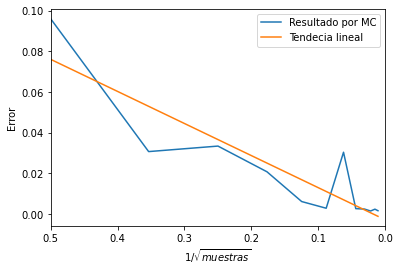

In [40]:
import matplotlib.pyplot as plt

def graficarError():
    '''
    Se grafica el error contra 1/raiz(numero de muestras) para 1500 iteraciones con la que se calcula el promedio de MC
    :return: Grafica del error contra 1/raiz(n)
    '''
    #En las siguientes listas se almacenan los resultados en memoria
    muestras = []
    resultados = []
    numeroDeMuestra = 4
    #Se itera para cada numero de muestras deseado
    while(numeroDeMuestra <= 8192):
        muestras += [numeroDeMuestra]
        resultados += [variasIteracionesMC(1500, numeroDeMuestra)]
        numeroDeMuestra = 2*numeroDeMuestra
    #Se cambian las listas para ser manipuladas por Numpy
    muestrasNum = np.array(muestras)
    resultadosNum = np.array(resultados)
    #En las siguintes lineas se les da el tratamiento deseado para grafica deseada por el resultado
    ejeX = 1/((muestrasNum)**(1/2))
    ejeY = np.abs((155/6) - resultadosNum)
    #Funciones para graficar la tendencia
    z = np.polyfit(ejeX, ejeY, 1)
    p = np.poly1d(z)
    #Realizan graficas deseadas
    fig, ax = plt.subplots()
    ax.set_xlabel('$1/\sqrt{muestras}$')
    ax.set_ylabel('Error')
    ax.plot(ejeX, ejeY, label = 'Resultado por MC')
    ax.plot(ejeX, p(ejeX), label = 'Tendecia lineal')
    ax.set_xlim(0.5, 0)
    plt.legend()
    plt.show()

graficarError()

Se observa como el error decrece mientras el numero de muestras crece de forma aproximadamente lineal para el numero de iteraciones de 1500 seleccionada justo como se esperaba en la teoria. Sin embargo cada vez que se calcula el error varia por lo que no es una gráfica exactamente lineal la del error contra el numero de muestras elevado a a la -1/2. Lo importante a notar es que se cumple la ecuacion donde cuando N tiende a infinito, el error se aproxima a 0.